In [1]:
import yfinance as yf
# BTC-USD
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
stock = "^NSEBANK" #"BTC-USD"
bit_coin_data = yf.download(stock, start, end)
bit_coin_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-13,12062.349609,12308.700195,12062.349609,12141.450195,12141.308594,34400
2014-03-14,11984.500000,12090.049805,11867.150391,12055.849609,12055.709961,34700
2014-03-18,12093.200195,12268.750000,12052.349609,12114.849609,12114.708984,38200
2014-03-19,12190.849609,12256.450195,12132.400391,12186.549805,12186.408203,33300
2014-03-20,12160.650391,12160.650391,11989.950195,12017.250000,12017.110352,22800


In [3]:
bit_coin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2181.000000,2181.000000,2181.000000,2181.000000,2181.000000,2.181000e+03
mean,29032.144971,29237.682940,28785.464506,29014.023928,29013.755518,1.064234e+06
std,9232.092699,9267.654013,9187.014220,9229.467712,9229.473516,3.887132e+07
min,11984.500000,12090.049805,11867.150391,12017.250000,12017.110352,0.000000e+00
25%,21492.050781,21650.500000,21230.550781,21431.150391,21430.900391,0.000000e+00
50%,27466.849609,27589.750000,27246.250000,27468.699219,27468.380859,0.000000e+00
75%,36086.949219,36466.449219,35747.148438,36082.351562,36081.933594,1.759000e+05
max,48479.050781,48636.449219,48343.148438,48508.550781,48508.550781,1.798102e+09


In [4]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2181 entries, 2014-03-13 to 2024-03-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2181 non-null   float64
 1   High       2181 non-null   float64
 2   Low        2181 non-null   float64
 3   Close      2181 non-null   float64
 4   Adj Close  2181 non-null   float64
 5   Volume     2181 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.3 KB


In [5]:
bit_coin_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
Closing_price = bit_coin_data[['Close']]
Closing_price

,Close
Date,
2014-03-13,12141.450195
2014-03-14,12055.849609
2014-03-18,12114.849609
2014-03-19,12186.549805
2014-03-20,12017.250000
...,...
2024-03-06,47965.398438
2024-03-07,47835.800781
2024-03-11,47327.851562


Text(0.5, 1.0, 'Close price of Bit Coin')

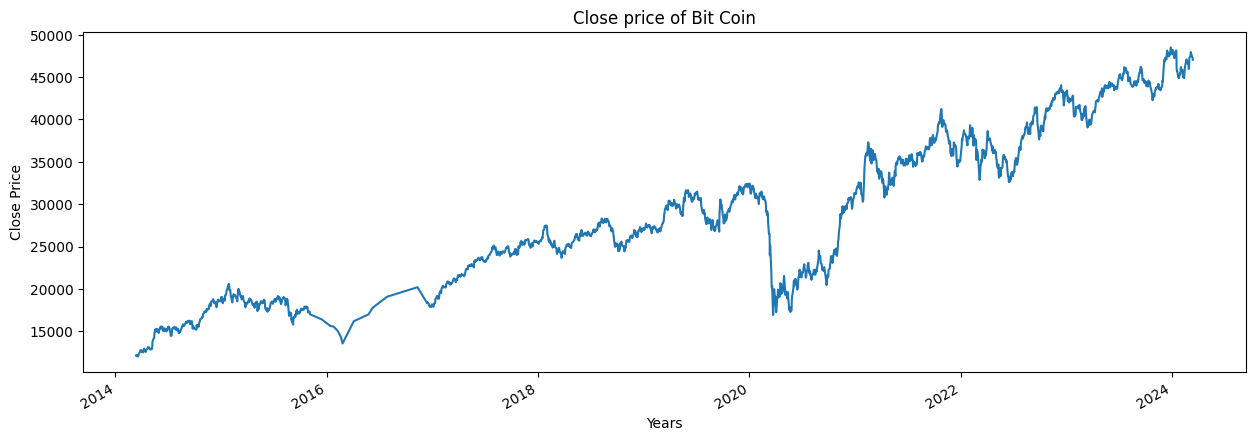

In [7]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [8]:
(2+3+4+5+6)//5

4

In [9]:
for i in range(2014,2024):
    print(list(Closing_price.index.year).count(i))

192
196
25
246
245
241
249
247
247
245


In [10]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()
Closing_price['MA_for_365_days'].head()

C:\Users\Frank Castle\AppData\Local\Temp\ipykernel_11124\686540890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


Date
2014-03-13   NaN
2014-03-14   NaN
2014-03-18   NaN
2014-03-19   NaN
2014-03-20   NaN
Name: MA_for_365_days, dtype: float64

In [11]:
Closing_price['MA_for_365_days'][0:365].tail()

Date
2015-09-23             NaN
2015-09-28             NaN
2015-09-29             NaN
2015-09-30             NaN
2015-10-05    16869.277317
Name: MA_for_365_days, dtype: float64

Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

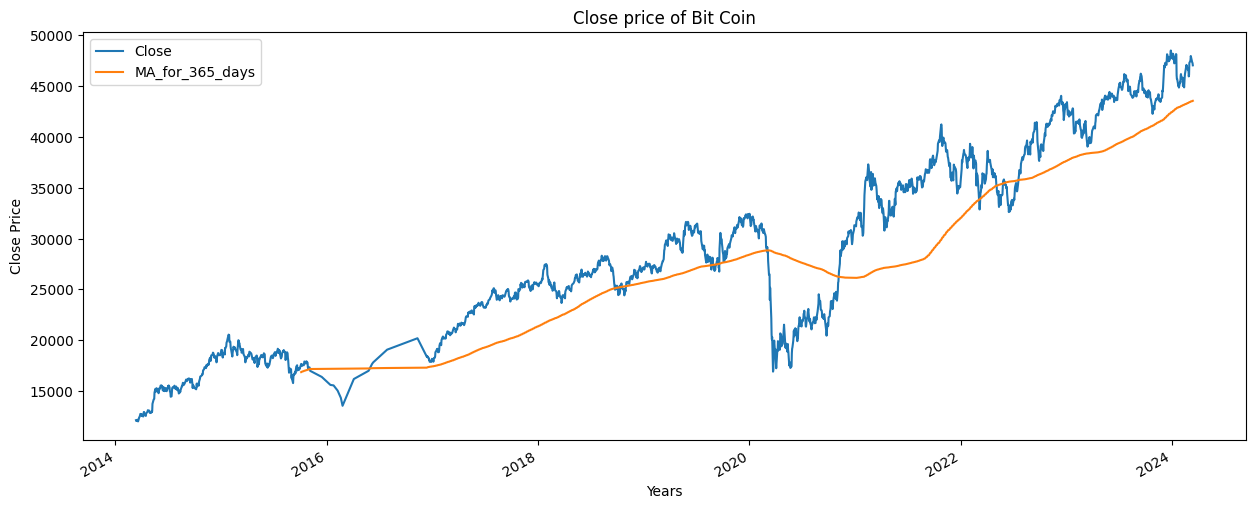

In [12]:
plt.figure()
Closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

C:\Users\Frank Castle\AppData\Local\Temp\ipykernel_11124\1013624105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

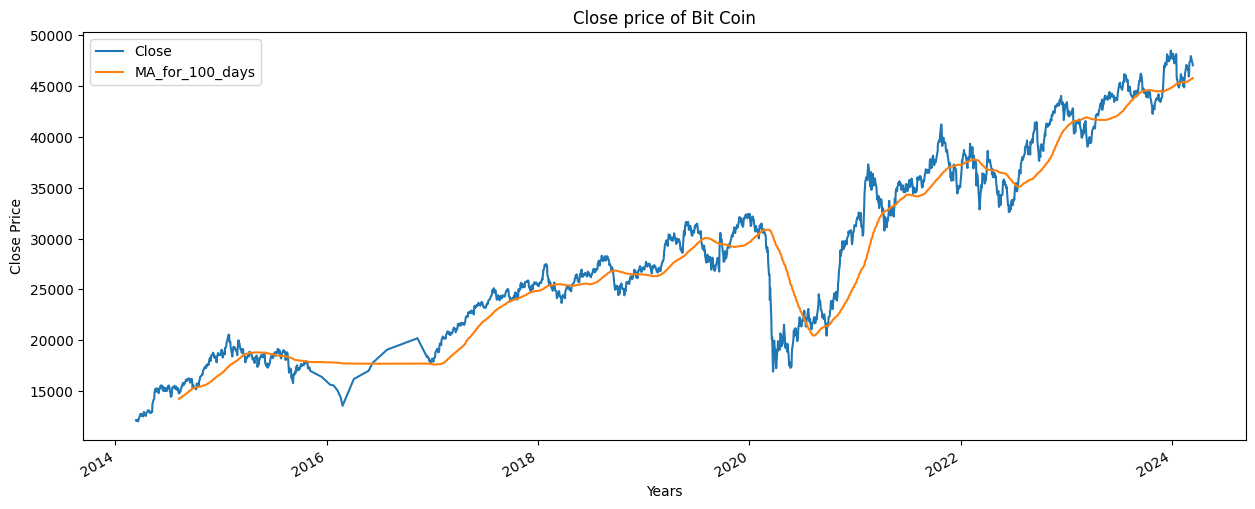

In [13]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [14]:
# 1 to 100 ==> 101 day
# 2 to 101 (100 days) ==> 102 day
# 3 to 102 (100 days) ==> 103rd day future days close price using our model

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[0.00340356],
       [0.00105778],
       [0.0026746 ],
       ...,
       [0.96764436],
       [0.96639878],
       [0.96007407]])

In [16]:
scaled_data.shape

(2181, 1)

In [17]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [18]:
x_data[0], y_data[0]

(array([[0.00340356],
        [0.00105778],
        [0.0026746 ],
        [0.00463946],
        [0.        ],
        [0.00205801],
        [0.01071215],
        [0.01185899],
        [0.01373203],
        [0.01610521],
        [0.02020893],
        [0.01986226],
        [0.01565442],
        [0.01912921],
        [0.0149789 ],
        [0.01464596],
        [0.01340594],
        [0.02521561],
        [0.02554445],
        [0.02255196],
        [0.01541875],
        [0.01495974],
        [0.02110092],
        [0.02579382],
        [0.02657756],
        [0.03027707],
        [0.02787651],
        [0.02916585],
        [0.0244798 ],
        [0.02298081],
        [0.02260128],
        [0.02366044],
        [0.02600071],
        [0.02523753],
        [0.02795599],
        [0.04749762],
        [0.05666555],
        [0.05887156],
        [0.06001018],
        [0.06081723],
        [0.0777103 ],
        [0.08782642],
        [0.08478597],
        [0.08042601],
        [0.08326093],
        [0

In [19]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]


In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1872, 100, 1)
(1872, 1)
(209, 100, 1)
(209, 1)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(10))

model.add(Dense(1))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 117,864
Trainable params: 117,864
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x_train, y_train, batch_size = 5, epochs=10)

Epoch 1/10
375/375 [==============================] - 35s 74ms/step - loss: 0.0021
Epoch 2/10
375/375 [==============================] - 41s 108ms/step - loss: 6.7896e-04
Epoch 3/10
375/375 [==============================] - 66s 176ms/step - loss: 4.8259e-04
Epoch 4/10
375/375 [==============================] - 79s 211ms/step - loss: 4.4916e-04
Epoch 5/10
375/375 [==============================] - 97s 258ms/step - loss: 4.2264e-04
Epoch 6/10
375/375 [==============================] - 115s 308ms/step - loss: 3.6736e-04
Epoch 7/10
375/375 [==============================] - 145s 387ms/step - loss: 2.9162e-04
Epoch 8/10
375/375 [==============================] - 116s 308ms/step - loss: 2.7469e-04
Epoch 9/10
375/375 [==============================] - 103s 274ms/step - loss: 3.1951e-04
Epoch 10/10
375/375 [==============================] - 107s 285ms/step - loss: 2.6675e-04


In [25]:
predictions = model.predict(x_test)
predictions

7/7 [==============================] - 8s 281ms/step


array([[0.8599447 ],
       [0.861921  ],
       [0.865558  ],
       [0.8698491 ],
       [0.87817705],
       [0.88627505],
       [0.8831231 ],
       [0.8765045 ],
       [0.8762789 ],
       [0.88206106],
       [0.881675  ],
       [0.8830275 ],
       [0.8767341 ],
       [0.8754019 ],
       [0.8837823 ],
       [0.89307743],
       [0.8975466 ],
       [0.89006865],
       [0.87957144],
       [0.88121575],
       [0.8866059 ],
       [0.88964665],
       [0.8927307 ],
       [0.88631827],
       [0.88439083],
       [0.88330156],
       [0.88665116],
       [0.8854182 ],
       [0.8719108 ],
       [0.88086647],
       [0.8767127 ],
       [0.8786222 ],
       [0.8815131 ],
       [0.87878054],
       [0.87538916],
       [0.87513804],
       [0.8868894 ],
       [0.8945369 ],
       [0.9053172 ],
       [0.91650814],
       [0.9209306 ],
       [0.916682  ],
       [0.91951275],
       [0.9101217 ],
       [0.9066562 ],
       [0.9041847 ],
       [0.9020176 ],
       [0.902

In [26]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[43397.75 ],
       [43469.87 ],
       [43602.586],
       [43759.17 ],
       [44063.07 ],
       [44358.58 ],
       [44243.562],
       [44002.04 ],
       [43993.805],
       [44204.805],
       [44190.715],
       [44240.074],
       [44010.418],
       [43961.805],
       [44267.617],
       [44606.81 ],
       [44769.895],
       [44497.01 ],
       [44113.953],
       [44173.96 ],
       [44370.652],
       [44481.613],
       [44594.152],
       [44360.156],
       [44289.82 ],
       [44250.074],
       [44372.3  ],
       [44327.31 ],
       [43834.406],
       [44161.215],
       [44009.633],
       [44079.312],
       [44184.81 ],
       [44085.094],
       [43961.34 ],
       [43952.176],
       [44381.   ],
       [44660.066],
       [45053.45 ],
       [45461.824],
       [45623.203],
       [45468.168],
       [45571.465],
       [45228.773],
       [45102.316],
       [45012.125],
       [44933.043],
       [44966.867],
       [45132.49 ],
       [45734.9  ],


In [27]:
inv_y_test = scaler.inverse_transform(y_test)

In [28]:
inv_predictions[:5], inv_y_test[:5]

(array([[43397.75 ],
        [43469.87 ],
        [43602.586],
        [43759.17 ],
        [44063.07 ]], dtype=float32),
 array([[43198.1484375 ],
        [43331.05078125],
        [43475.30078125],
        [43793.55078125],
        [44072.1015625 ]]))

In [29]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.head()

,original_test_data,predictions
Date,,
2023-05-09,43198.148438,43397.750000
2023-05-10,43331.050781,43469.871094
2023-05-11,43475.300781,43602.585938
2023-05-12,43793.550781,43759.171875
2023-05-15,44072.101562,44063.070312


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

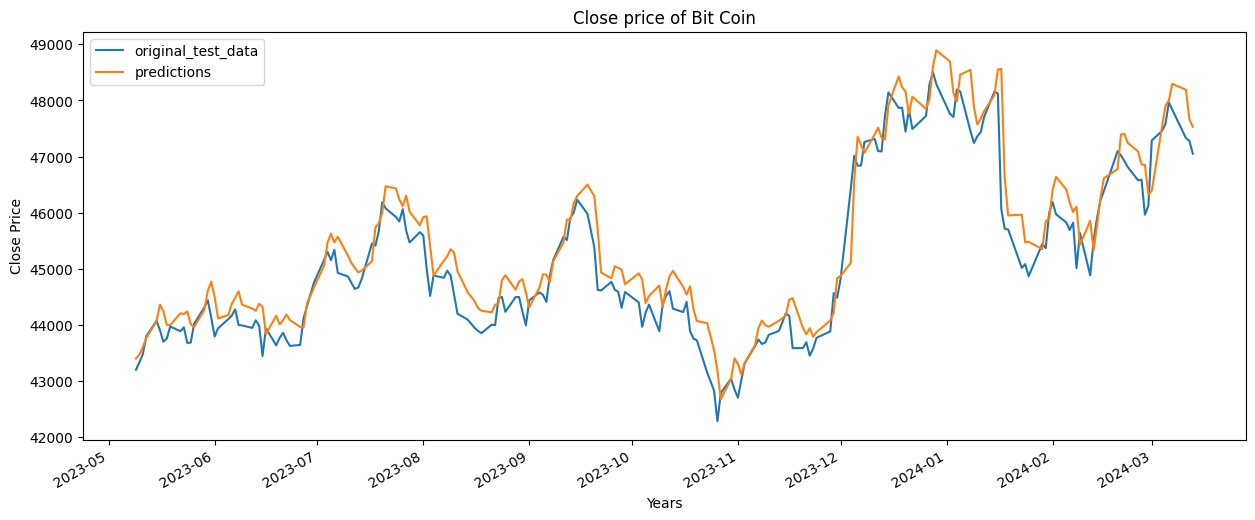

In [30]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [31]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()

,Close
Date,
2024-03-06,47965.398438
2024-03-07,47835.800781
2024-03-11,47327.851562
2024-03-12,47282.398438
2024-03-13,47051.601562


In [32]:
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.32236209],
        [0.31239954],
        [0.34187765],
        [0.25826058],
        [0.23671425],
        [0.23166492],
        [0.1398514 ],
        [0.08860243],
        [0.        ],
        [0.08057469],
        [0.12186111],
        [0.09084204],
        [0.06756159],
        [0.11833705],
        [0.16667221],
        [0.21502304],
        [0.23404878],
        [0.22132482],
        [0.22533116],
        [0.24724689],
        [0.25867012],
        [0.30851423],
        [0.30206821],
        [0.2093315 ],
        [0.20949205],
        [0.22622174],
        [0.18776133],
        [0.20829604],
        [0.2390586 ],
        [0.25701628],
        [0.3670766 ],
        [0.35347774],
        [0.40685406],
        [0.66650319],
        [0.7597617 ],
        [0.73123124],
        [0.73233066],
        [0.79986027],
        [0.80824926],
        [0.77345715],
        [0.77260609],
        [0.87536932],
        [0.94139749],
        [0.89710819],
        [0.89762184],
        [0

In [33]:
last_100.shape

(1, 100, 1)

In [34]:
day101 = model.predict(last_100)
day101

1/1 [==============================] - 0s 302ms/step


array([[0.76476234]], dtype=float32)

In [35]:
scaler.inverse_transform(day101)

array([[47043.395]], dtype=float32)

In [36]:
# tmr day 101 ==> past 100
#     day 102 ==> day101 + past 99 days
#     day 103 ==> day 102 + + day 101 + past 98 days

In [37]:

def predict_future(no_of_days, prev_100):
    
    future_predictions = []
    for i in range(no_of_days):
        next_day = model.predict(prev_100).tolist()
        prev_100[0].append(next_day[0])
        prev_100 = [prev_100[0][1:]]
        
        future_predictions.append(scaler.inverse_transform(next_day))
        
    return future_predictions

In [38]:
no_of_days = 10
last_100 = last_100.tolist()
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 [==============================] - 0s 223ms/step
[array([[47043.39600068]]), array([[47026.67490285]]), array([[47046.00842858]]), array([[47087.61868432]]), array([[47142.05274242]]), array([[47201.75583409]]), array([[47261.20722389]]), array([[47316.89607897]]), array([[47367.0857306]]), array([[47411.44169002]])]


Text(0.5, 1.0, 'Future Close price of Bit coin')

<Figure size 640x480 with 0 Axes>

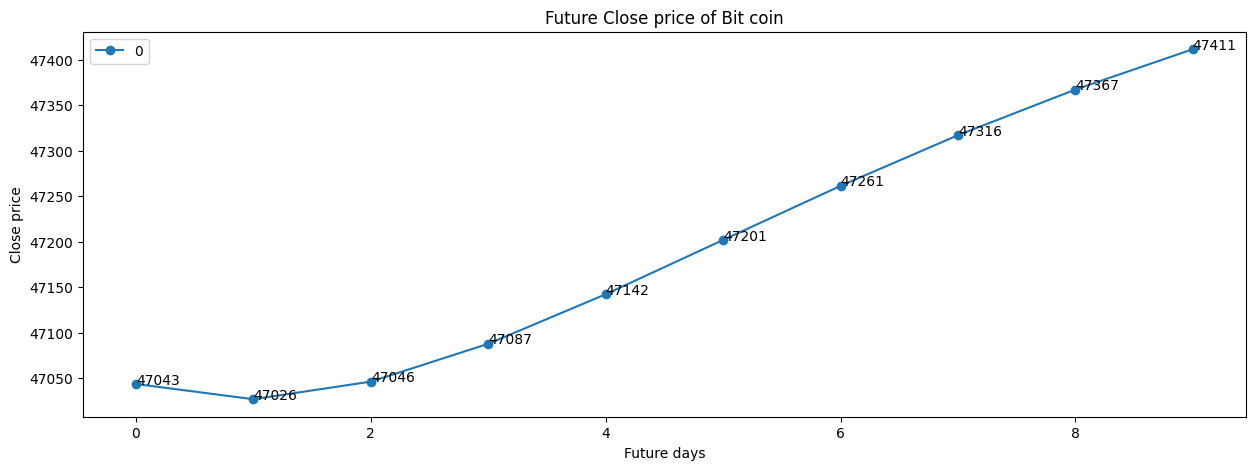

In [39]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Bit coin")

In [40]:
model.save("model.keras")